# Exploración
Despues de solucionar data faltante

In [7]:
import pandas as pd             
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('ChronicKidneyDiseaseImputed.csv')

df.head(5)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [9]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


In [10]:
df.describe(exclude=[np.number])

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,353,324,358,378,253,263,366,318,324,340,250


In [11]:
categorical_variables_mask = df.dtypes==object
categorical_variables = df.columns[categorical_variables_mask].tolist()
categorical_variables.remove('class')
numerical_variables = df.columns[~categorical_variables_mask]

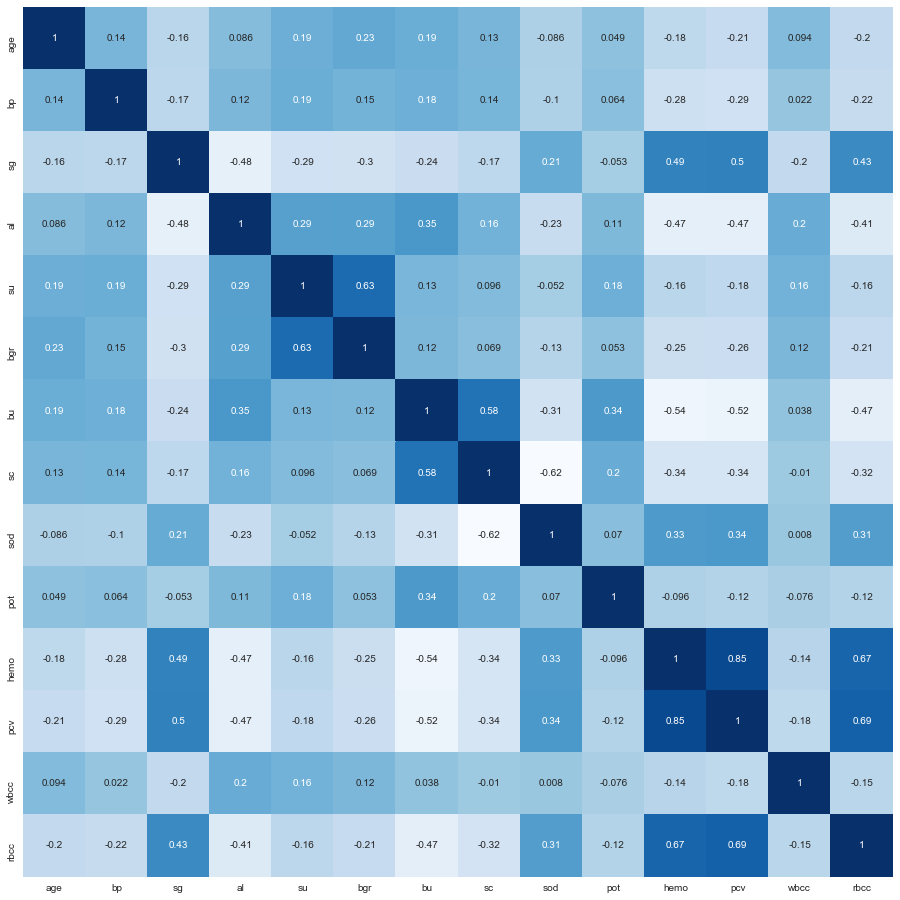

In [12]:
cov=df[numerical_variables].corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

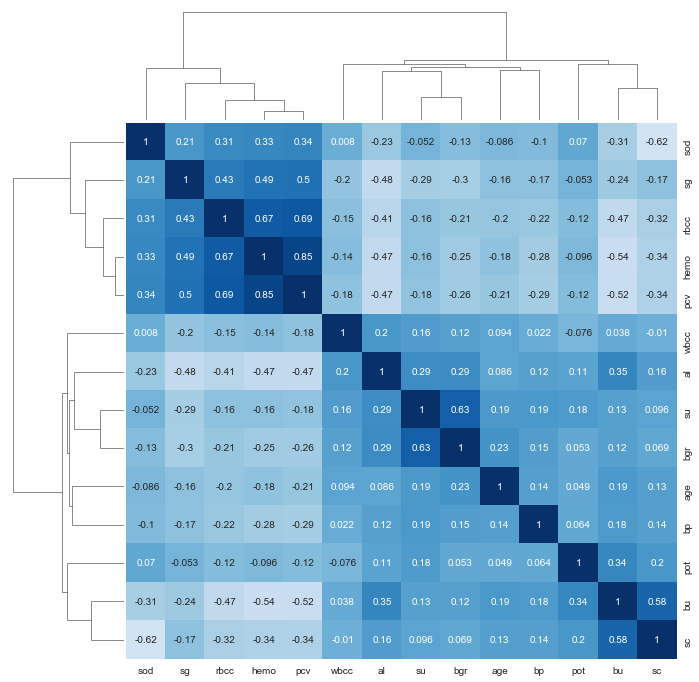

In [13]:
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(12, 12))
cm.cax.set_visible(False)

Varian con más input data

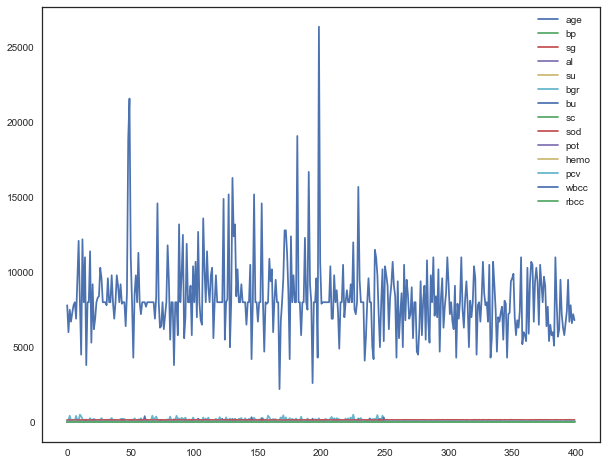

In [9]:
plt.figure(figsize=(10,8))
for v in numerical_variables:
    plt.plot(df[v])
plt.legend(loc='best')

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[numerical_variables])
df_normalized_values = scaler.transform(df[numerical_variables])
df_normalized = pd.DataFrame(data = df_normalized_values, columns=numerical_variables)

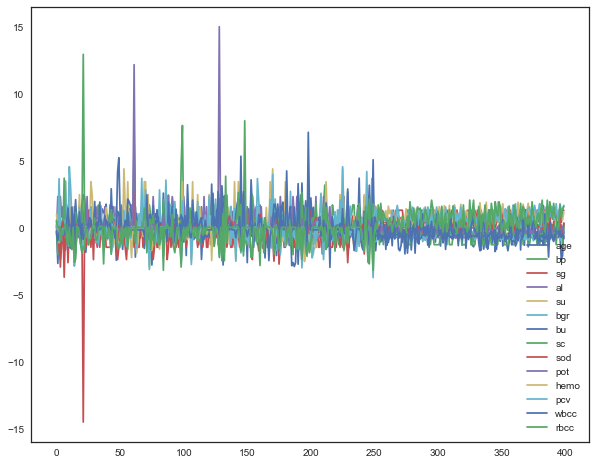

In [11]:
plt.figure(figsize=(10,8))
for v in numerical_variables:
    plt.plot(df_normalized[v])
plt.legend(loc='best')

(Iris-versicolor, Iris-setosa, and Iris-virginica)calculamos mean y barras

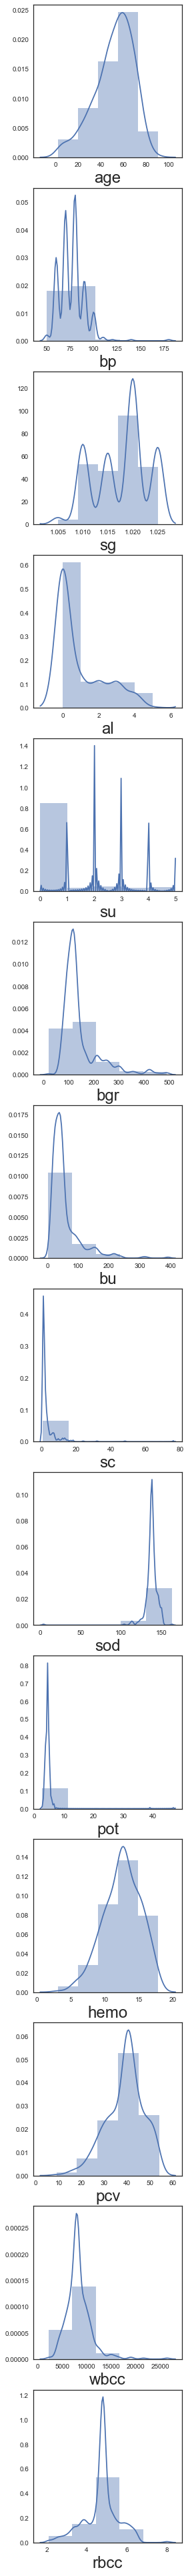

In [12]:
plt.figure(figsize=(4,len(numerical_variables)*5))
for i,v in enumerate(numerical_variables):
    plt.subplot(len(numerical_variables), 1, i+1)
    hist1 = sns.distplot(df[v],bins=5)

Por cada clase

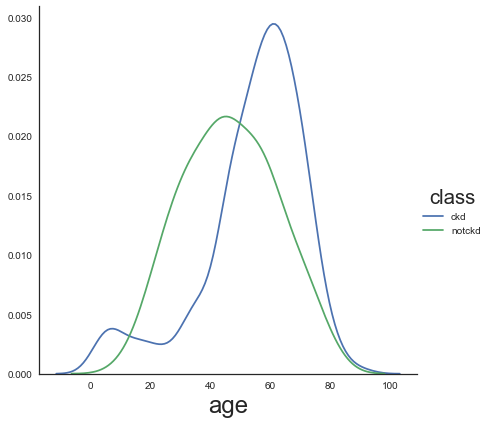

In [13]:
numerical_variables_with_class = numerical_variables.tolist()
numerical_variables_with_class.append('class')

sns.FacetGrid(df[numerical_variables_with_class], hue="class", size=6) \
   .map(sns.kdeplot, "age") \
   .add_legend()

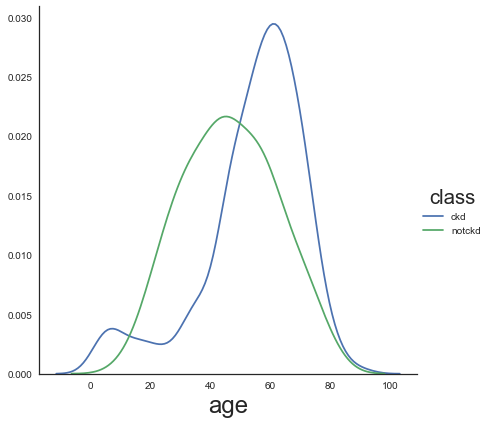

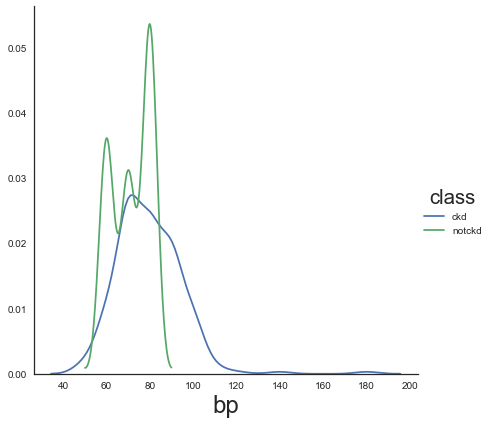

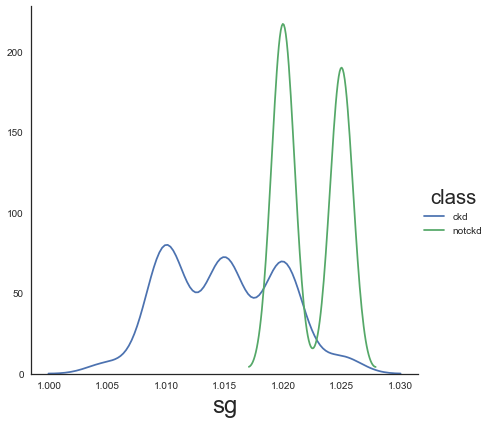

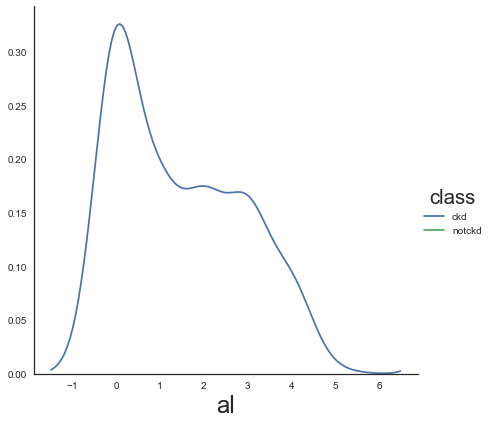

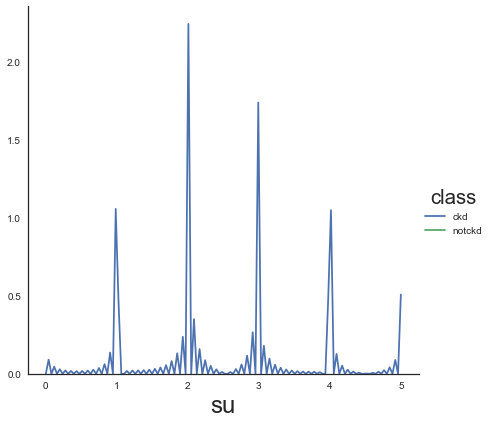

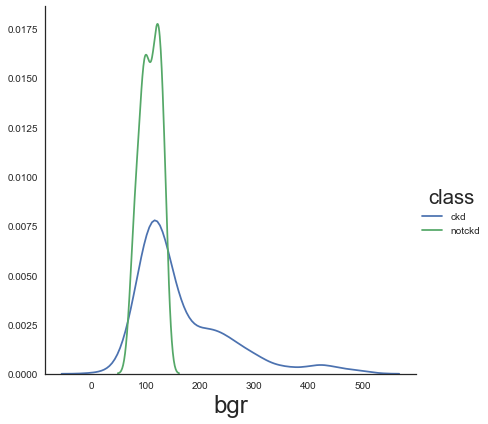

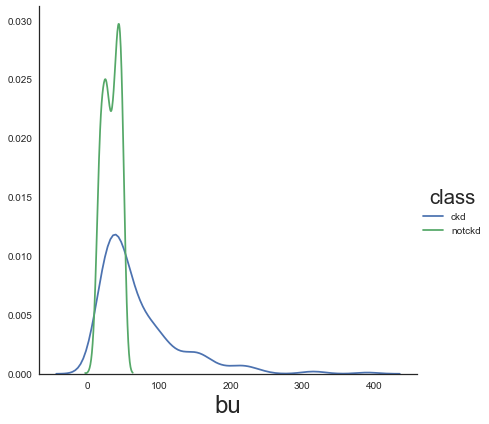

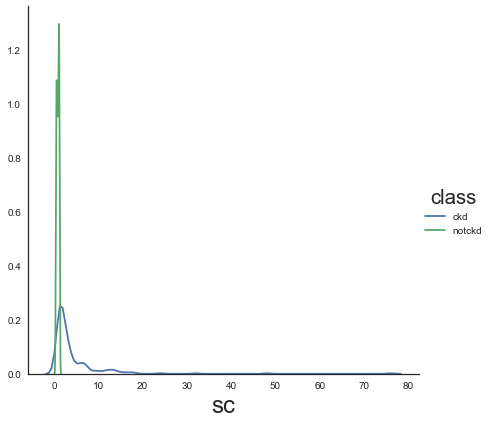

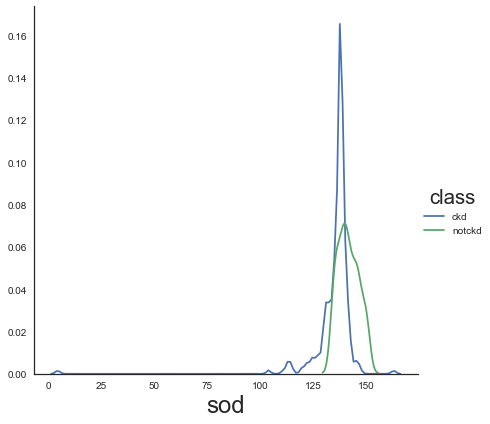

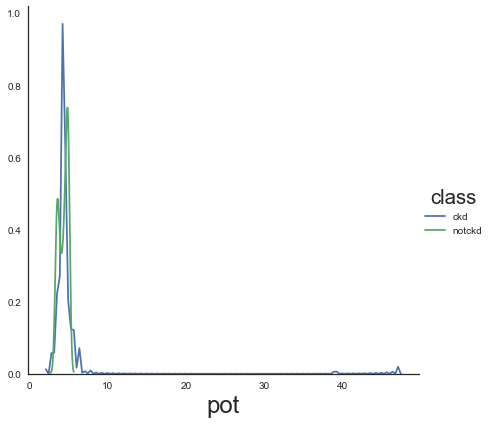

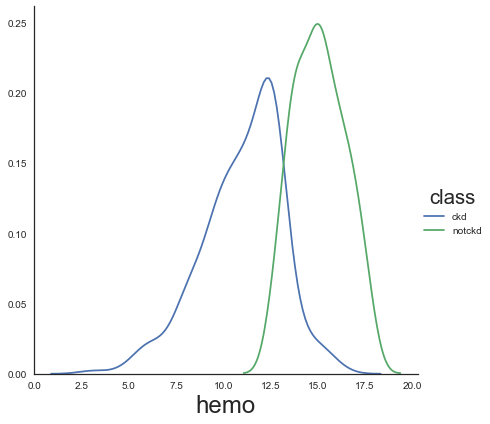

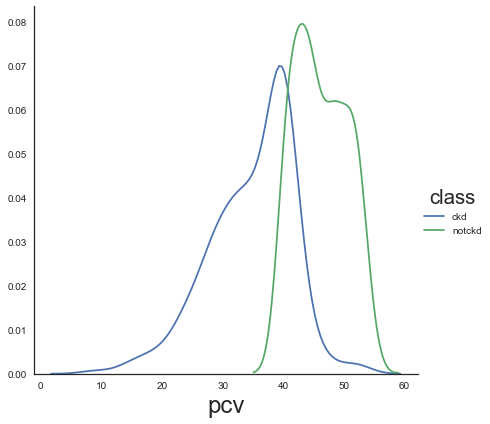

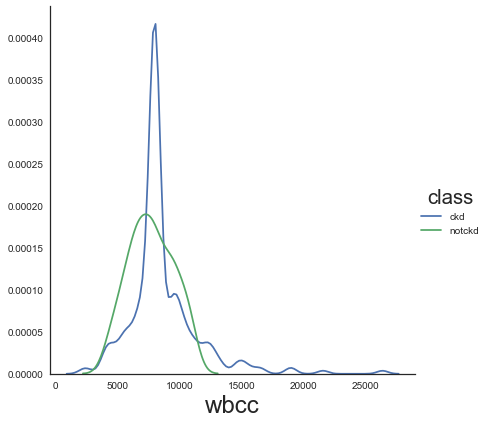

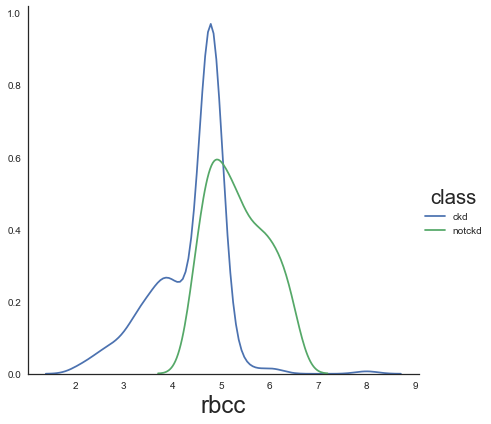

In [15]:
plt.figure(figsize=(6,len(numerical_variables)*4))
for i,v in enumerate(numerical_variables):
    sns.FacetGrid(df[numerical_variables_with_class], hue="class", size=6) \
   .map(sns.kdeplot, v) \
   .add_legend()

Scatter

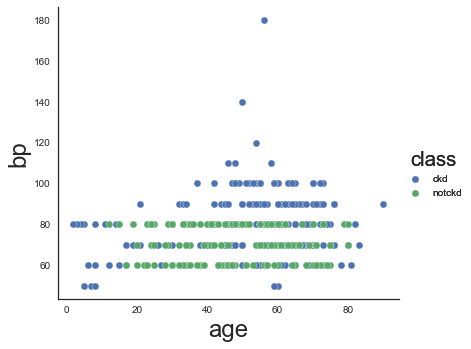

In [14]:
sns.pairplot(df[numerical_variables_with_class], x_vars=["age"], y_vars=["bp"], hue="class", size=5) \
   .add_legend()

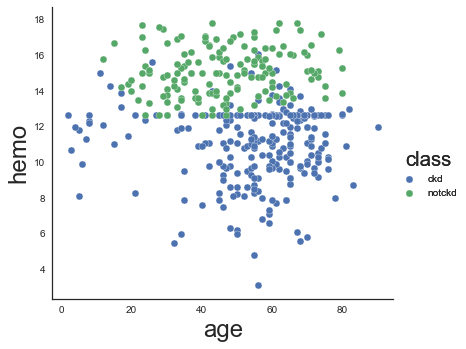

In [15]:
sns.pairplot(df[numerical_variables_with_class], x_vars=["age"], y_vars=["hemo"], hue="class", size=5) \
   .add_legend()

Histogramas combinados

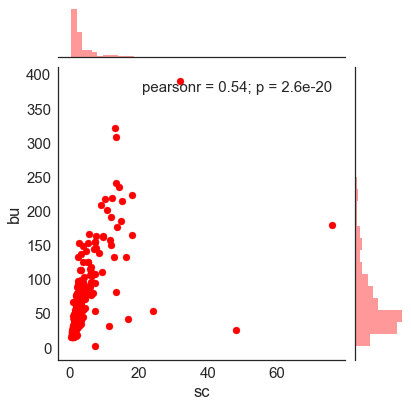

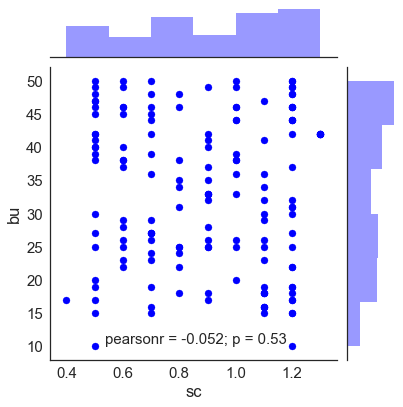

In [16]:
colors = {'ckd':'r', 'notckd':'b'}
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.jointplot(x="sc", y="bu", data=df[df[numerical_variables_with_class]['class']=='ckd'], color='red', size=6)
sns.jointplot(x="sc", y="bu", data=df[df[numerical_variables_with_class]['class']=='notckd'], color='blue', size=6)

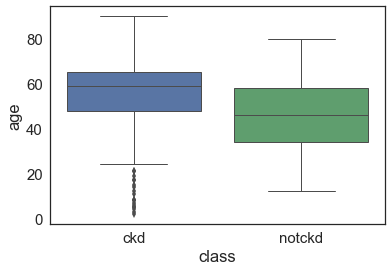

In [17]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="class", y="age", data=df[numerical_variables_with_class])

Scatter en Box Plot

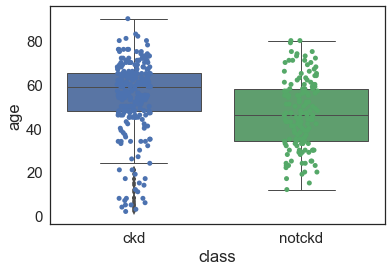

In [18]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
ax = sns.boxplot(x="class", y="age", data=df[numerical_variables_with_class])
ax = sns.stripplot(x="class", y="age", data=df[numerical_variables_with_class], jitter=True, edgecolor="gray")

Combinaciones de atributos

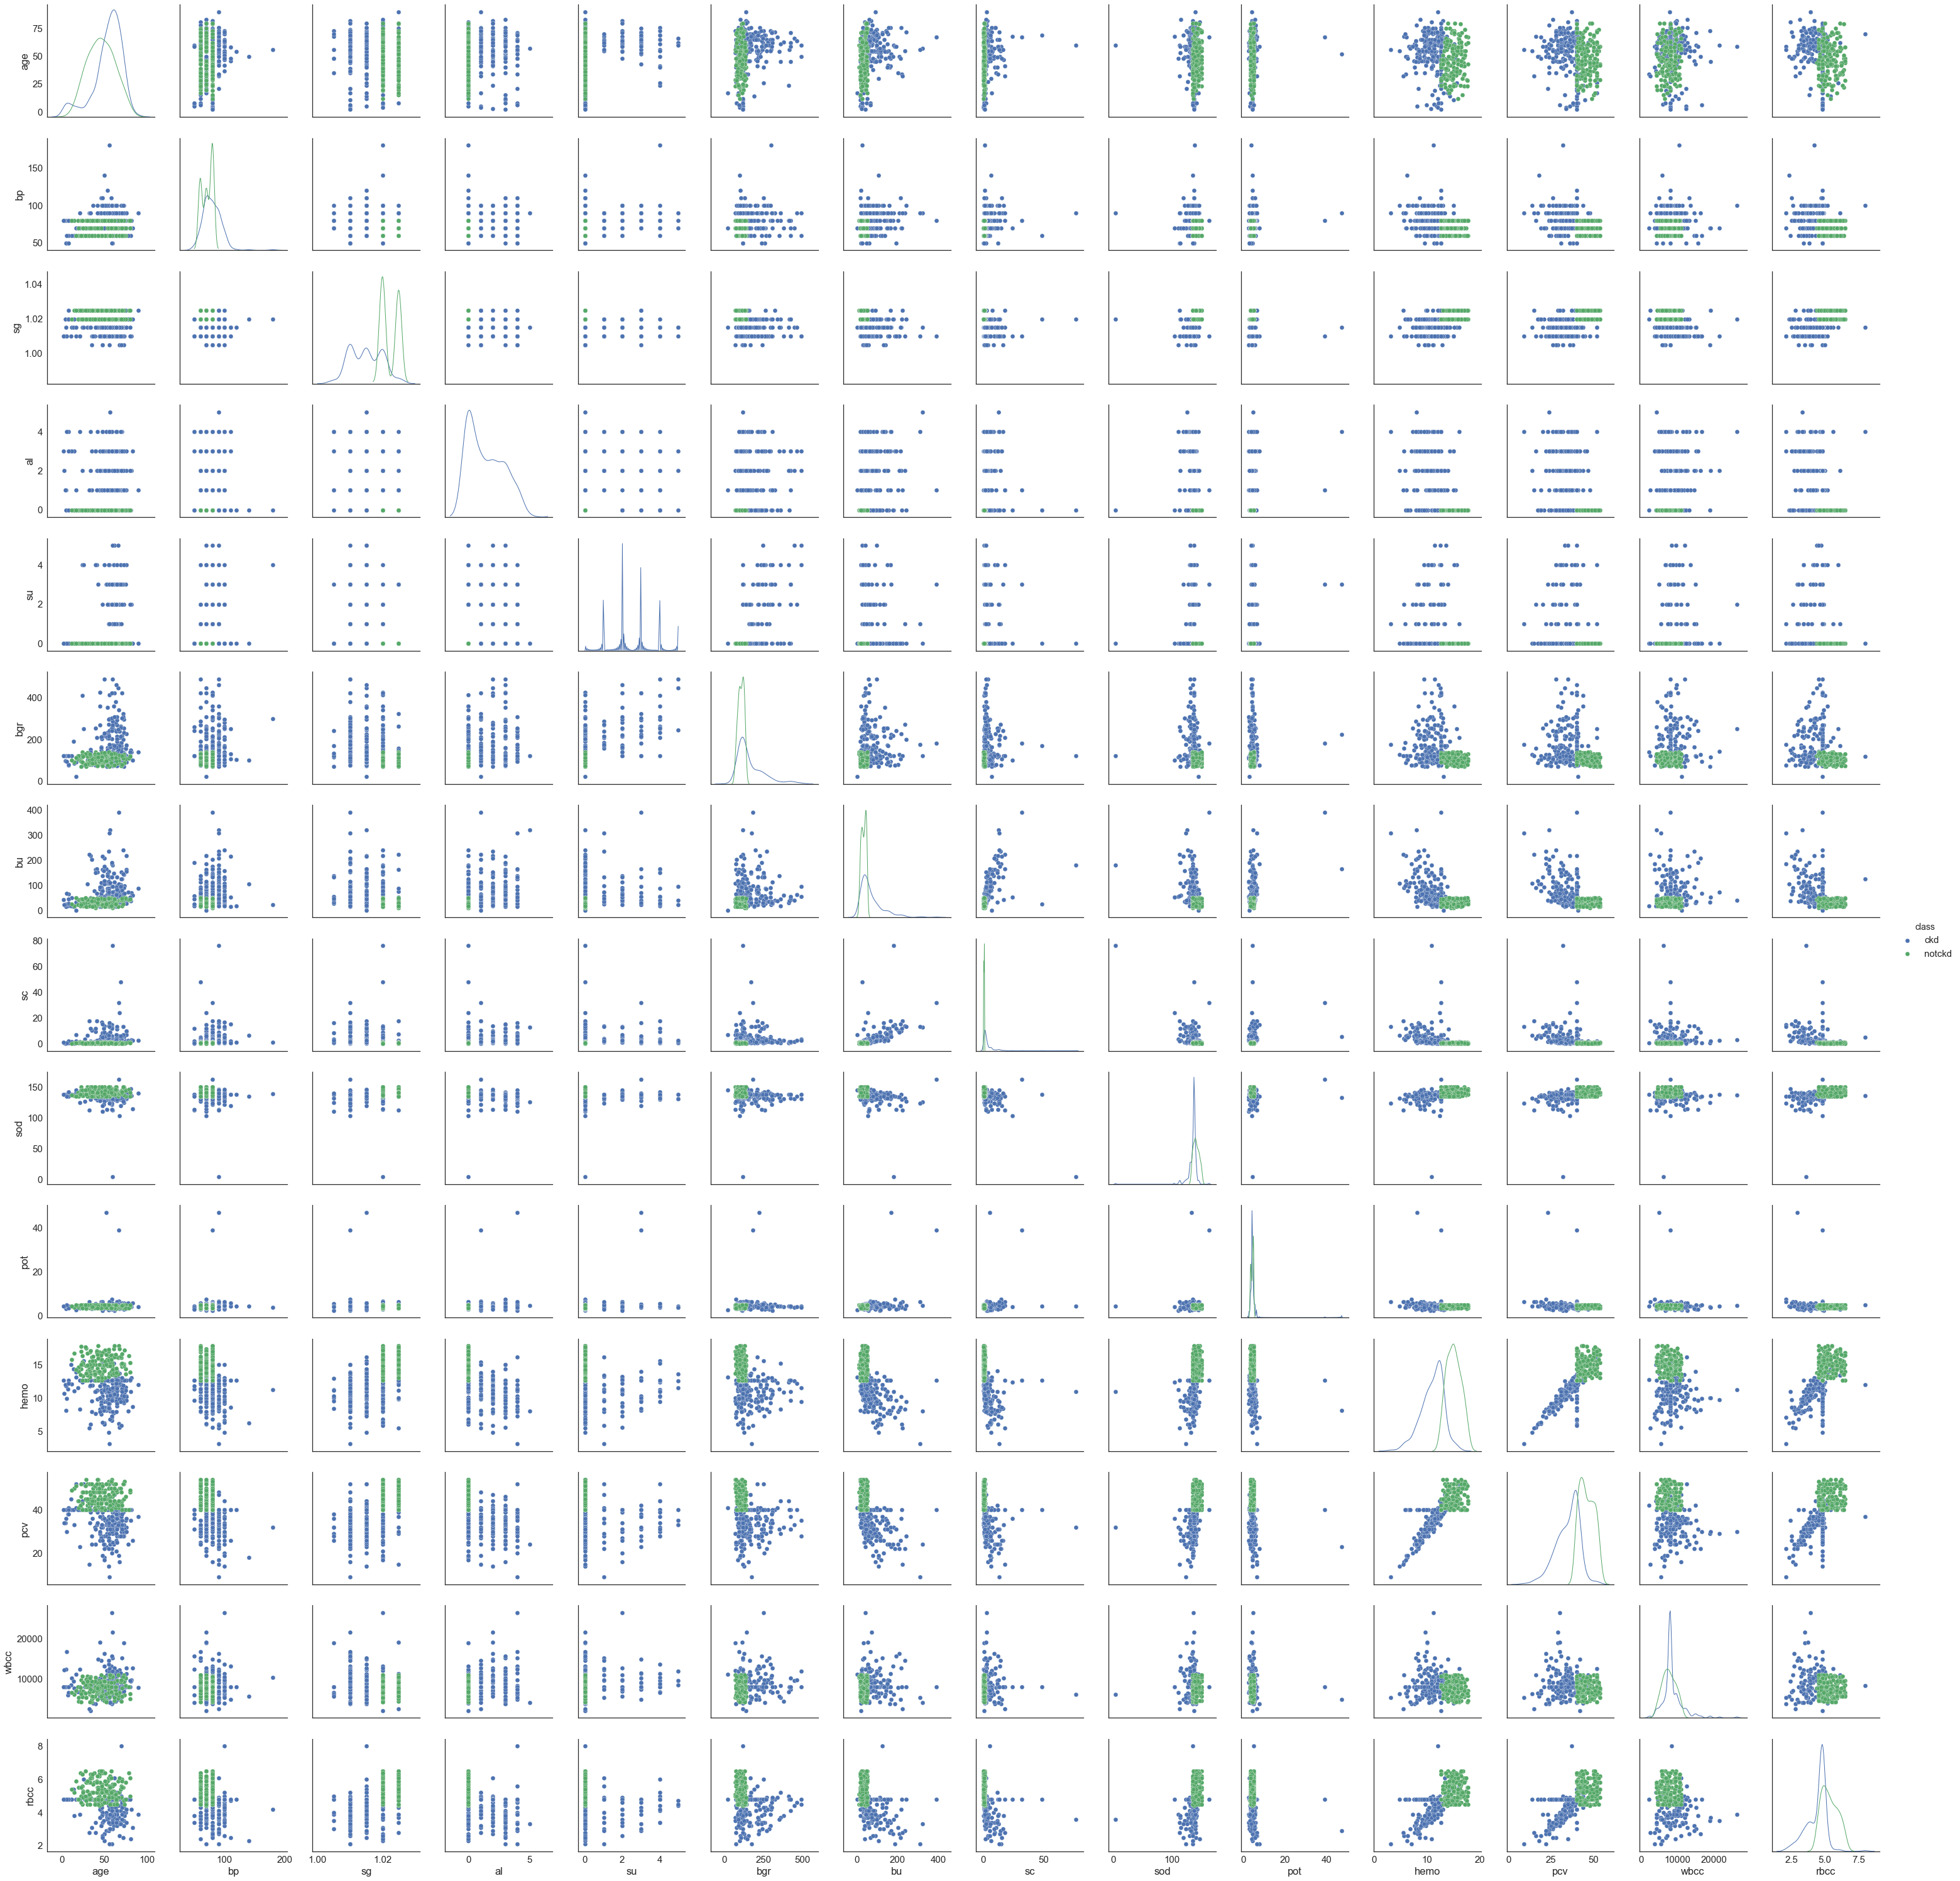

In [19]:
sns.pairplot(df, hue="class", size=3,diag_kind="kde")

We can replace the diagonal bar plots with a gaussian kernel density estimate.

## Principal Component Analysis

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
x = df.loc[:, numerical_variables].values
y = df.loc[:,['class']].values

Normalize

In [23]:
x = StandardScaler().fit_transform(x)

In [24]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(x)
pca_ckd = pd.DataFrame(data = new_data, 
                        columns = ['principal component 1', 'principal component 2'])

In [25]:
pca_ckd_complete = pca_ckd
pca_ckd_complete['class'] = df[['class']]

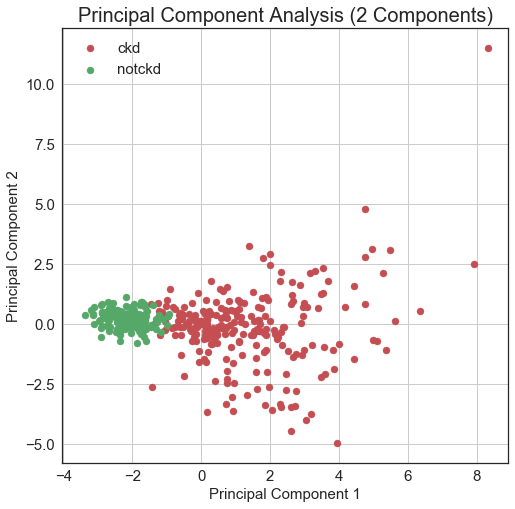

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis (2 Components)', fontsize = 20)
targets = ['ckd', 'notckd']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca_ckd_complete['class'] == target
    ax.scatter(pca_ckd_complete.loc[indicesToKeep, 'principal component 1']
               , pca_ckd_complete.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [27]:
print("Explained Variance")
print("   Component 1 %3.2f"%(pca.explained_variance_ratio_[0]))
print("   Component 2 %3.2f"%(pca.explained_variance_ratio_[1]))
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))


Explained Variance
   Component 1 0.32
   Component 2 0.12
   Total Explained Variance 0.45


In [28]:
print("Components")
for i,c in enumerate(pca.components_):
    print("Component %d\t%s"%(i,str(c)))

Components
Component 0	[ 0.15289174  0.1714626  -0.29923619  0.29776098  0.18959306  0.2095459
  0.32159826  0.25900731 -0.23468419  0.10639846 -0.39258749 -0.39833149
  0.10477624 -0.35845123]
Component 1	[-0.14121477 -0.05941113  0.19837286 -0.16034526 -0.49149458 -0.47442935
  0.28233545  0.409359   -0.3227177   0.0716598  -0.07791829 -0.05856015
 -0.27123134 -0.07196698]


In [29]:
data = np.dot(x,np.transpose(pca.components_))
data[:5,:]

array([[-1.33652044,  0.05452443],
       [-0.56011686,  0.41758094],
       [ 2.72866216, -3.40803867],
       [ 2.60375325,  0.84815621],
       [ 0.59594435, -0.12737416]])

In [30]:
pca_ckd.head(5)

,principal component 1,principal component 2,class
0,-1.336520,0.054524,ckd
1,-0.560117,0.417581,ckd
2,2.728662,-3.408039,ckd
3,2.603753,0.848156,ckd
4,0.595944,-0.127374,ckd


We can apply PCA with the same number of components as the 

In [31]:
x = df.loc[:, numerical_variables].values
y = df.loc[:,['class']].values
full_pca = PCA()
fitted = full_pca.fit_transform(x)
full_pca.explained_variance_ratio_

array([  9.98644374e-01,   8.84916585e-04,   3.78789547e-04,
         4.14248396e-05,   2.68896850e-05,   1.35370582e-05,
         6.47992980e-06,   1.98117823e-06,   9.88507541e-07,
         2.90938685e-07,   1.84445214e-07,   9.06362812e-08,
         5.23666135e-08,   2.89626069e-12])

# t-SNE

In [37]:
from sklearn.manifold import TSNE
x = df.loc[:, numerical_variables].values
y = df.loc[:,['class']].values

perplexity=50
tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300, random_state=1)
# tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)
tsne_result = tsne.fit_transform(x)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 12.466769
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.073067
[t-SNE] Error after 300 iterations: 0.177769


In [35]:
ckd_tsne = pd.DataFrame({'x':tsne_result[:,0], 'y':tsne_result[:,1], 'class':df['class']})

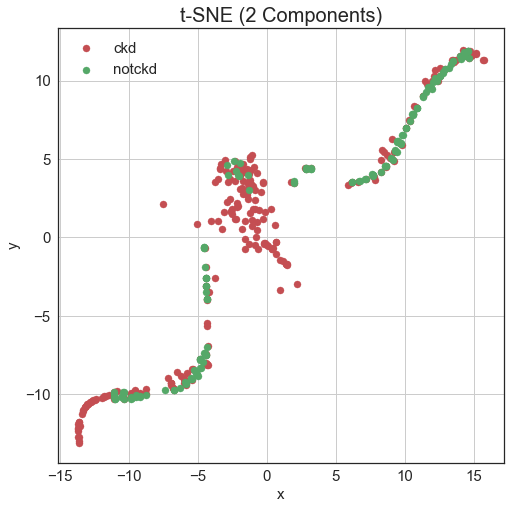

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_title('t-SNE (2 Components)', fontsize = 20)
targets = ['ckd', 'notckd']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = ckd_tsne['class'] == target
    ax.scatter(ckd_tsne.loc[indicesToKeep,'x'], ckd_tsne.loc[indicesToKeep,'y'], c=color, s=50)
ax.legend(targets)
ax.grid()

You can try to modify the random_state to generate different t-SNE maps and see if you can find a better representation.